<a href="https://colab.research.google.com/github/burakerdal66/Makine_Ogrenmesi_Projeleri/blob/main/region_growing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

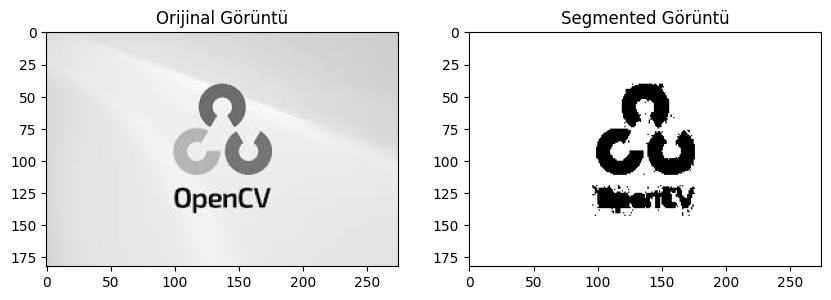

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def region_growing(image, seeds, threshold):
    height, width = image.shape  # Görüntü boyutlarını al
    segmented_image = np.zeros_like(image)  # Aynı boyutta sıfırlardan oluşan bir görüntü oluştur
    visited = np.zeros_like(image, dtype=bool)  # Ziyaret edilen pikselleri işaretlemek için bir matris oluştur

    # Geçerli tohum noktalarını belirle (görüntü boyutlarının içinde kalanlar)
    valid_seeds = [seed for seed in seeds if 0 <= seed[0] < height and 0 <= seed[1] < width]

    if not valid_seeds:
        raise ValueError("No valid seed points provided.")  # Geçerli tohum noktası yoksa hata ver

    to_check = list(valid_seeds)  # İşlenecek noktaların listesi

    for seed in valid_seeds:  # Her tohum noktası için
        segmented_image[seed] = 200  # Tohum noktasını başlangıçta işaretle
        visited[seed] = True  # Tohum noktasını ziyaret edilmiş olarak işaretle

    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Dört yön: yukarı, aşağı, sol, sağ

    while to_check:  # İşlenecek nokta kalmayana kadar
        current_point = to_check.pop(0)  # İlk noktayı al ve listeden çıkar
        region_mean = image[current_point]  # Mevcut bölgenin ortalama yoğunluğunu al

        for d in directions:  # Dört yön için
            new_point = (current_point[0] + d[0], current_point[1] + d[1])  # Yeni noktayı hesapla

            if (0 <= new_point[0] < height and 0 <= new_point[1] < width and
                not visited[new_point]):  # Yeni nokta görüntü boyutları içinde ve ziyaret edilmemişse

                if abs(int(image[new_point]) - int(region_mean)) < threshold:  # Benzerlik kriterini kontrol et
                    segmented_image[new_point] = 255  # Yeni noktayı bölgeye ekle
                    to_check.append(new_point)  # Yeni noktayı işlenecekler listesine ekle
                    visited[new_point] = True  # Yeni noktayı ziyaret edilmiş olarak işaretle

    return segmented_image  # Segmentasyon sonucunu döndür

# Örnek kullanım
image = cv2.imread('/content/drive/MyDrive/opendeneme.png', 0)  # Grayscale görüntüyü yükle
height, width = image.shape  # Görüntü boyutlarını al

# Geçerli koordinatlar içinde tohum noktalarını belirle
seed_points = [(min(100, height-1), min(100, width-1)),
               (min(200, height-1), min(200, width-1)),
               (min(300, height-1), min(300, width-1))]  # Başlangıç noktaları

threshold_value = 10  # Benzerlik eşiği

segmented = region_growing(image, seed_points, threshold_value)  # Bölge büyütme algoritmasını çalıştır

plt.figure(figsize=(10, 5))  # Görüntüleri göstermek için bir figür oluştur

plt.subplot(1, 2, 1)  # İlk subplot
plt.title("Orijinal Görüntü")  # Başlık ekle
plt.imshow(image, cmap='gray')  # Orijinal görüntüyü göster

plt.subplot(1, 2, 2)  # İkinci subplot
plt.title("Segmented Görüntü")  # Başlık ekle
plt.imshow(segmented, cmap='gray')  # Segmentasyon sonucunu göster

plt.show()  # Görüntüleri göster


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
